In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
score = pd.read_csv('data/customer_grade.csv', encoding='utf-8',thousands=",")

In [6]:
score

,Age,Income,Score,rank
0,20,16,6,F
1,23,16,77,B
2,31,17,40,F
3,22,17,76,B
4,35,18,6,F
...,...,...,...,...
107,32,103,69,A
108,38,113,91,A
109,47,120,16,C
110,35,120,79,A


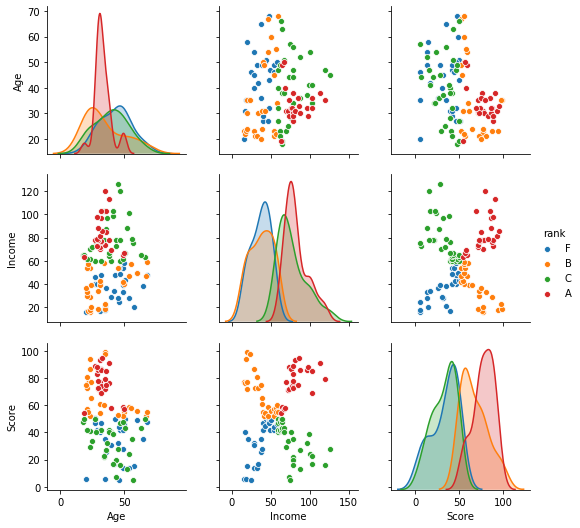

In [7]:
sns.pairplot(score, hue='rank')

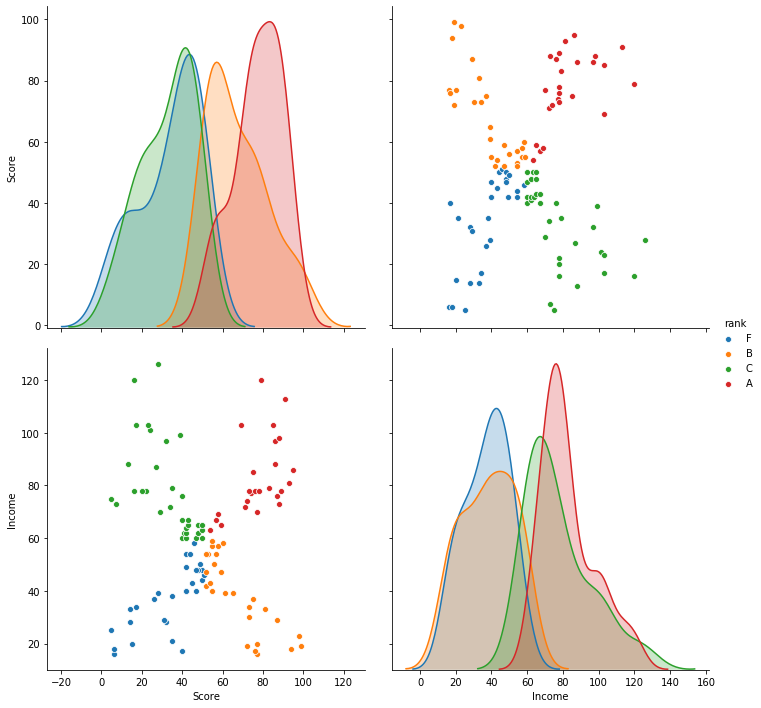

In [8]:
sns.pairplot(score, hue='rank',vars=['Score','Income'],height=5)


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [11]:
rank_data=score.loc[:,['Score','Income']]

In [12]:
rank_data

,Score,Income
0,6,16
1,77,16
2,40,17
3,76,17
4,6,18
...,...,...
107,69,103
108,91,113
109,16,120
110,79,120


In [14]:
rank_label=score.loc[:,'rank']

In [15]:
rank_label

0      F
1      B
2      F
3      B
4      F
      ..
107    A
108    A
109    C
110    A
111    C
Name: rank, Length: 112, dtype: object

In [63]:
clf = LinearSVC()

In [72]:
x_train, x_test, y_train, y_test = train_test_split(rank_data,rank_label, test_size=0.2, train_size=0.8, shuffle=True)

In [73]:
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [80]:
x_test

,Score,Income
12,5,25
42,42,49
66,50,65
44,56,50
75,34,72
3,76,17
62,50,63
110,79,120
4,6,18
36,51,46


In [81]:
x_train

,Score,Income
60,48,62
1,77,16
111,28,126
33,54,43
57,47,60
...,...,...
98,86,88
13,14,28
84,22,78
58,50,60


In [76]:
test_data = x_test
test_label = clf.predict(test_data)

In [84]:
data = rank_data
correct= score['rank']

In [77]:
accuracy_score(y_test,test_label)

0.8260869565217391

In [78]:
from sklearn.tree import export_graphviz

In [79]:
score_clf=DecisionTreeClassifier(max_depth=4, random_state=20)

In [85]:
score_clf.fit(data, correct)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [87]:
export_graphviz(
    score_clf,
    out_file='scroe_tree.dot',
    feature_names=['Score','Income'],
    class_names= score['rank'],
    rounded=True,
    filled=True
)

In [88]:
import graphviz

In [90]:
with open('scroe_tree.dot') as f:
    dot_graph=f.read()

In [91]:
dot = graphviz.Source(dot_graph)
dot.format ='png'
dot.render(filename='scroe_tree', directory='images/tree', cleanup=True)

'images/tree\\scroe_tree.png'

In [92]:
score_clf.predict_proba([[50, 50]]) # [1,0,0] 

array([[0., 0., 0., 1.]])

In [93]:
score_clf.predict([[50, 50]]) # [1,0,0] 

array(['F'], dtype=object)

In [94]:
score_clf.predict([[50, 50],[50, 80],[20, 70],[80, 90],[10, 20]]) # [1,0,0] 

array(['F', 'C', 'C', 'A', 'F'], dtype=object)